In [34]:
import torch
import numpy as np

In [35]:
# recorded temperature data, c - celsius, u - unknown
t_cel = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_cel = torch.tensor(t_cel)
t_u = torch.tensor(t_u)

# 建立模型和损失函数

In [36]:
# use linear model
def model(t_u, w, b):
    t_est = w * t_u + b
    return t_est

# use square loss function
def loss_fn(t_cel, t_est):
    sqr_dif = (t_est - t_cel)**2
    return sqr_dif.mean()

In [37]:
# initialize parameters
w = torch.ones(())
b = torch.zeros(())
t_est = model(t_u, w, b)
loss = loss_fn(t_cel, t_est)
loss

tensor(1763.8848)

#### 损失函数的梯度

In [38]:
# chain rule of gradient
def dloss_model(t_cel, t_est):
    dsqr_dif = (t_est - t_cel) / t_est.size(0) * 2  # 均值的导数, 因为后面return [dloss_dw.sum(), dloss_db.sum()]
    return dsqr_dif
def dmodel_w(t_u, w, b):
    return t_u
def dmodel_b(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_cel, t_est, w, b):
    dloss_dmodel = dloss_model(t_cel, t_est)
    dloss_dw = dloss_dmodel * dmodel_w(t_u, w, b)
    dloss_db = dloss_dmodel * dmodel_b(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])
grad_fn(t_u, t_cel, t_est, w, b)

tensor([4517.2964,   82.6000])

# 迭代以适应模型

In [39]:
def training_loop(n_epochs, learning_rate, params, t_u, t_cel):
    for epoch in range(1, n_epochs + 1):
        w, b = params   # input tensor[w, b]
        t_est = model(t_u, w, b)
        loss = loss_fn(t_cel, t_est)
        grad = grad_fn(t_u, t_cel, t_est, w, b)
        params -= learning_rate * grad
        print(f'Epoch %d, Loss %f, Params {params}, Grad {grad}' % (epoch, float(loss)))
    return params

In [40]:
training_loop(
    n_epochs = 100,
    learning_rate = 3e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u, t_cel = t_cel
)

Epoch 1, Loss 1763.884766, Params tensor([-0.3552, -0.0248]), Grad tensor([4517.2964,   82.6000])
Epoch 2, Loss 1044.412231, Params tensor([ 0.6816, -0.0074]), Grad tensor([-3455.9453,   -57.8471])
Epoch 3, Loss 623.328979, Params tensor([-0.1115, -0.0223]), Grad tensor([2643.7959,   49.5984])
Epoch 4, Loss 376.882294, Params tensor([ 0.4953, -0.0125]), Grad tensor([-2022.6680,   -32.6006])
Epoch 5, Loss 232.644302, Params tensor([ 0.0311, -0.0216]), Grad tensor([1547.3005,   30.2835])
Epoch 6, Loss 148.225693, Params tensor([ 0.3862, -0.0163]), Grad tensor([-1183.8201,   -17.8248])
Epoch 7, Loss 98.817238, Params tensor([ 0.1145, -0.0220]), Grad tensor([905.5598,  18.9791])
Epoch 8, Loss 69.899025, Params tensor([ 0.3224, -0.0192]), Grad tensor([-692.8713,   -9.1771])
Epoch 9, Loss 52.973038, Params tensor([ 0.1634, -0.0229]), Grad tensor([529.9708,  12.3628])
Epoch 10, Loss 43.065723, Params tensor([ 0.2851, -0.0217]), Grad tensor([-405.5359,   -4.1161])
Epoch 11, Loss 37.266159, Par

tensor([ 0.2338, -0.1041])

# 归一化输入

目的是保证同一个学习率适用于每个参数.

In [42]:
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [60]:
params = training_loop(
    n_epochs = 2500,
    learning_rate = 3e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un, t_cel = t_cel
)

Epoch 1, Loss 80.364342, Params tensor([3.3284, 0.3192]), Grad tensor([-77.6140, -10.6400])
Epoch 2, Loss 63.488392, Params tensor([ 1.4492, -0.1044]), Grad tensor([62.6412, 14.1208])
Epoch 3, Loss 52.070919, Params tensor([3.0175, 0.0814]), Grad tensor([-52.2767,  -6.1953])
Epoch 4, Loss 44.319126, Params tensor([ 1.7608, -0.2313]), Grad tensor([41.8899, 10.4240])
Epoch 5, Loss 39.029301, Params tensor([ 2.8187, -0.1347]), Grad tensor([-35.2638,  -3.2208])
Epoch 6, Loss 35.393250, Params tensor([ 1.9799, -0.3726]), Grad tensor([27.9594,  7.9324])
Epoch 7, Loss 32.868412, Params tensor([ 2.6951, -0.3356]), Grad tensor([-23.8398,  -1.2333])
Epoch 8, Loss 31.090471, Params tensor([ 2.1369, -0.5231]), Grad tensor([18.6083,  6.2501])
Epoch 9, Loss 29.814831, Params tensor([ 2.6219, -0.5259]), Grad tensor([-16.1682,   0.0916])
Epoch 10, Loss 28.877258, Params tensor([ 2.2520, -0.6792]), Grad tensor([12.3318,  5.1112])
Epoch 11, Loss 28.167492, Params tensor([ 2.5824, -0.7084]), Grad tensor(

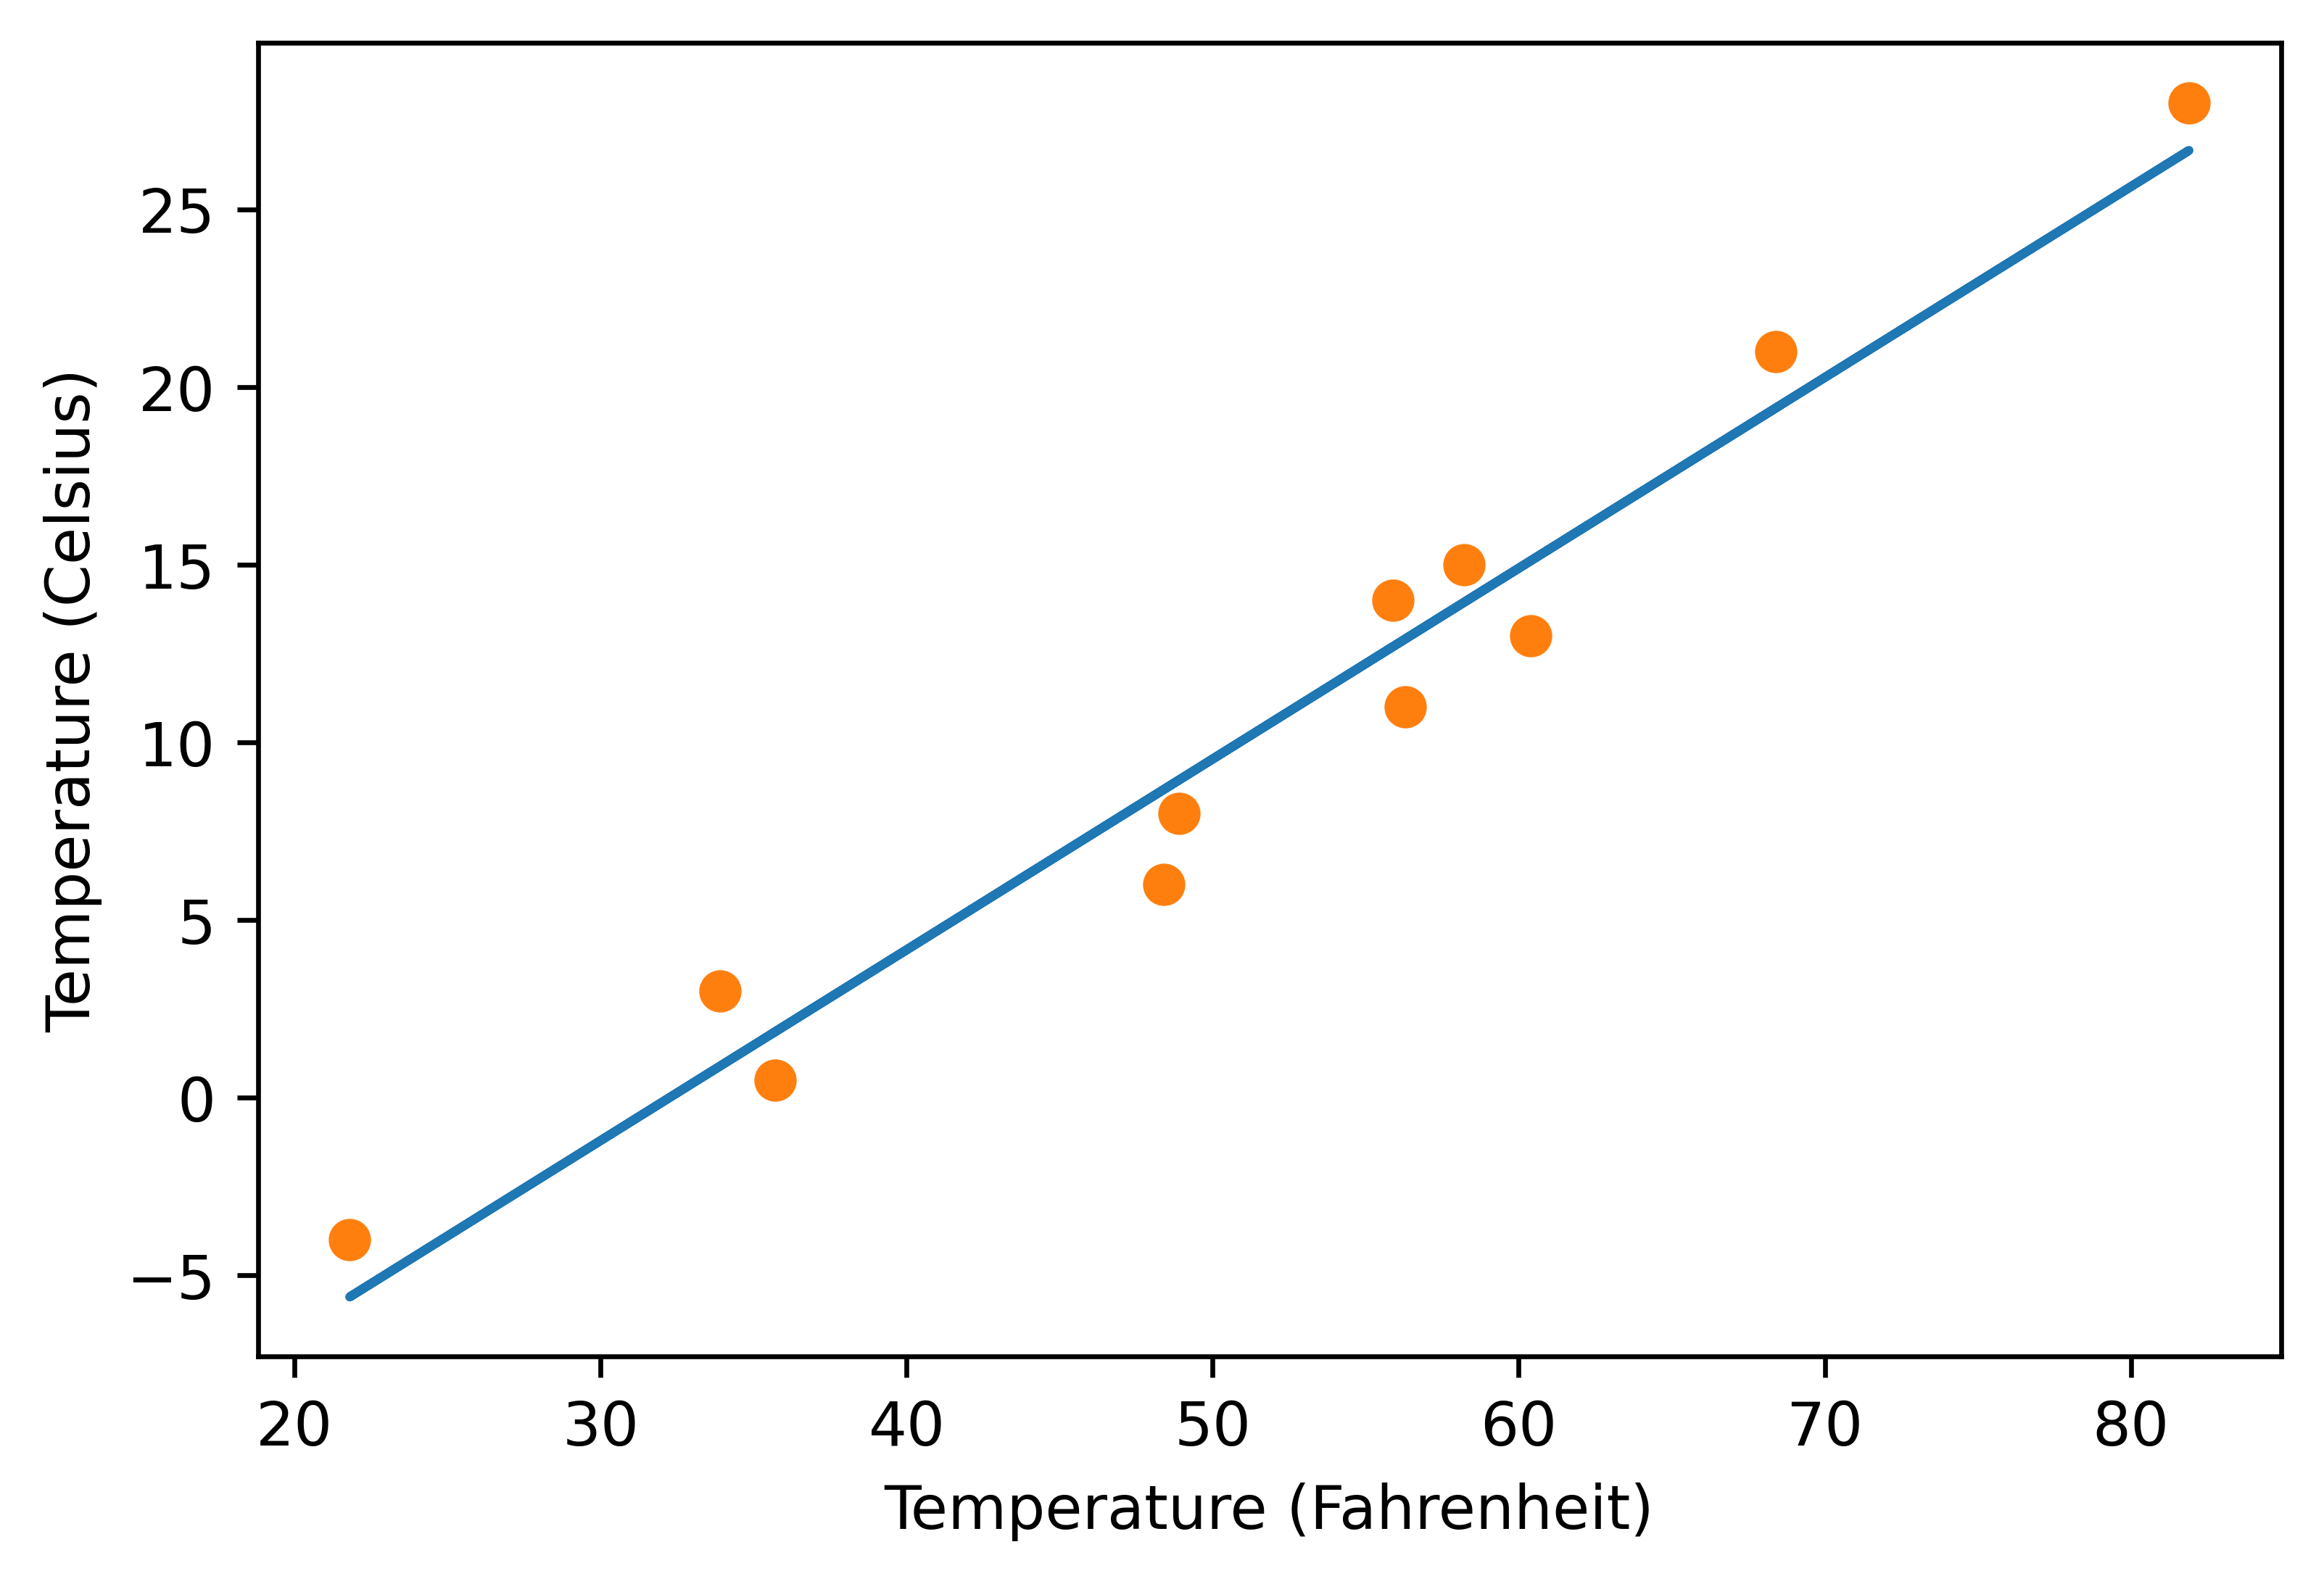

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)      # 技巧: 变量解包 *var 能分离出其内部的变量

fig = plt.figure(dpi=600)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_cel.numpy(), 'o')